In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
Fraud_data=pd.read_csv("D:\\ExcelR Assignments\\Decision Trees\\Fraud_check.csv")
Fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
Fraud_data=pd.get_dummies(Fraud_data,columns=['Undergrad','Marital.Status','Urban'])
Fraud_data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [11]:
Fraud_data=Fraud_data.rename({'Taxable.Income':'TaxInc'},axis=1)
Fraud_data.head()

,TaxInc,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [12]:
Fraud_data['IncVeri']=Fraud_data.TaxInc.map(lambda x:'Risky' if x<=30000 else 'Good')
Fraud_data.head()

,TaxInc,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,IncVeri
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good


In [18]:
columns=['Work.Experience','Marital.Status_Divorced','Marital.Status_Married',
         'Marital.Status_Single','Urban_NO','Urban_YES']

In [19]:
X=Fraud_data[columns]
Y=Fraud_data['IncVeri']

In [20]:
X

,Work.Experience,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,10,0,0,1,0,1
1,18,1,0,0,0,1
2,30,0,1,0,0,1
3,15,0,0,1,0,1
4,28,0,1,0,1,0
...,...,...,...,...,...,...
595,7,1,0,0,0,1
596,2,1,0,0,0,1
597,0,1,0,0,0,1
598,17,0,1,0,1,0


In [21]:
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: IncVeri, Length: 600, dtype: object

In [22]:
Y.value_counts()

Good     476
Risky    124
Name: IncVeri, dtype: int64

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [24]:
X_train

,Work.Experience,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
118,10,1,0,0,1,0
362,17,1,0,0,0,1
55,16,0,0,1,0,1
90,29,1,0,0,1,0
390,17,0,0,1,1,0
...,...,...,...,...,...,...
277,11,1,0,0,1,0
9,4,1,0,0,0,1
359,11,0,0,1,1,0
192,10,0,1,0,0,1


In [25]:
X_test

,Work.Experience,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
434,19,0,0,1,0,1
122,26,0,1,0,1,0
224,25,0,1,0,0,1
479,21,0,1,0,1,0
205,20,0,1,0,0,1
...,...,...,...,...,...,...
144,29,0,0,1,0,1
386,27,0,0,1,0,1
437,20,0,1,0,0,1
313,2,0,0,1,1,0


In [26]:
Y_train

118    Risky
362    Risky
55     Risky
90      Good
390     Good
       ...  
277     Good
9       Good
359     Good
192     Good
559     Good
Name: IncVeri, Length: 480, dtype: object

In [27]:
Y_test

434    Risky
122    Risky
224     Good
479     Good
205    Risky
       ...  
144     Good
386     Good
437    Risky
313     Good
471    Risky
Name: IncVeri, Length: 120, dtype: object

In [28]:
Y_test.value_counts()

Good     95
Risky    25
Name: IncVeri, dtype: int64

In [29]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

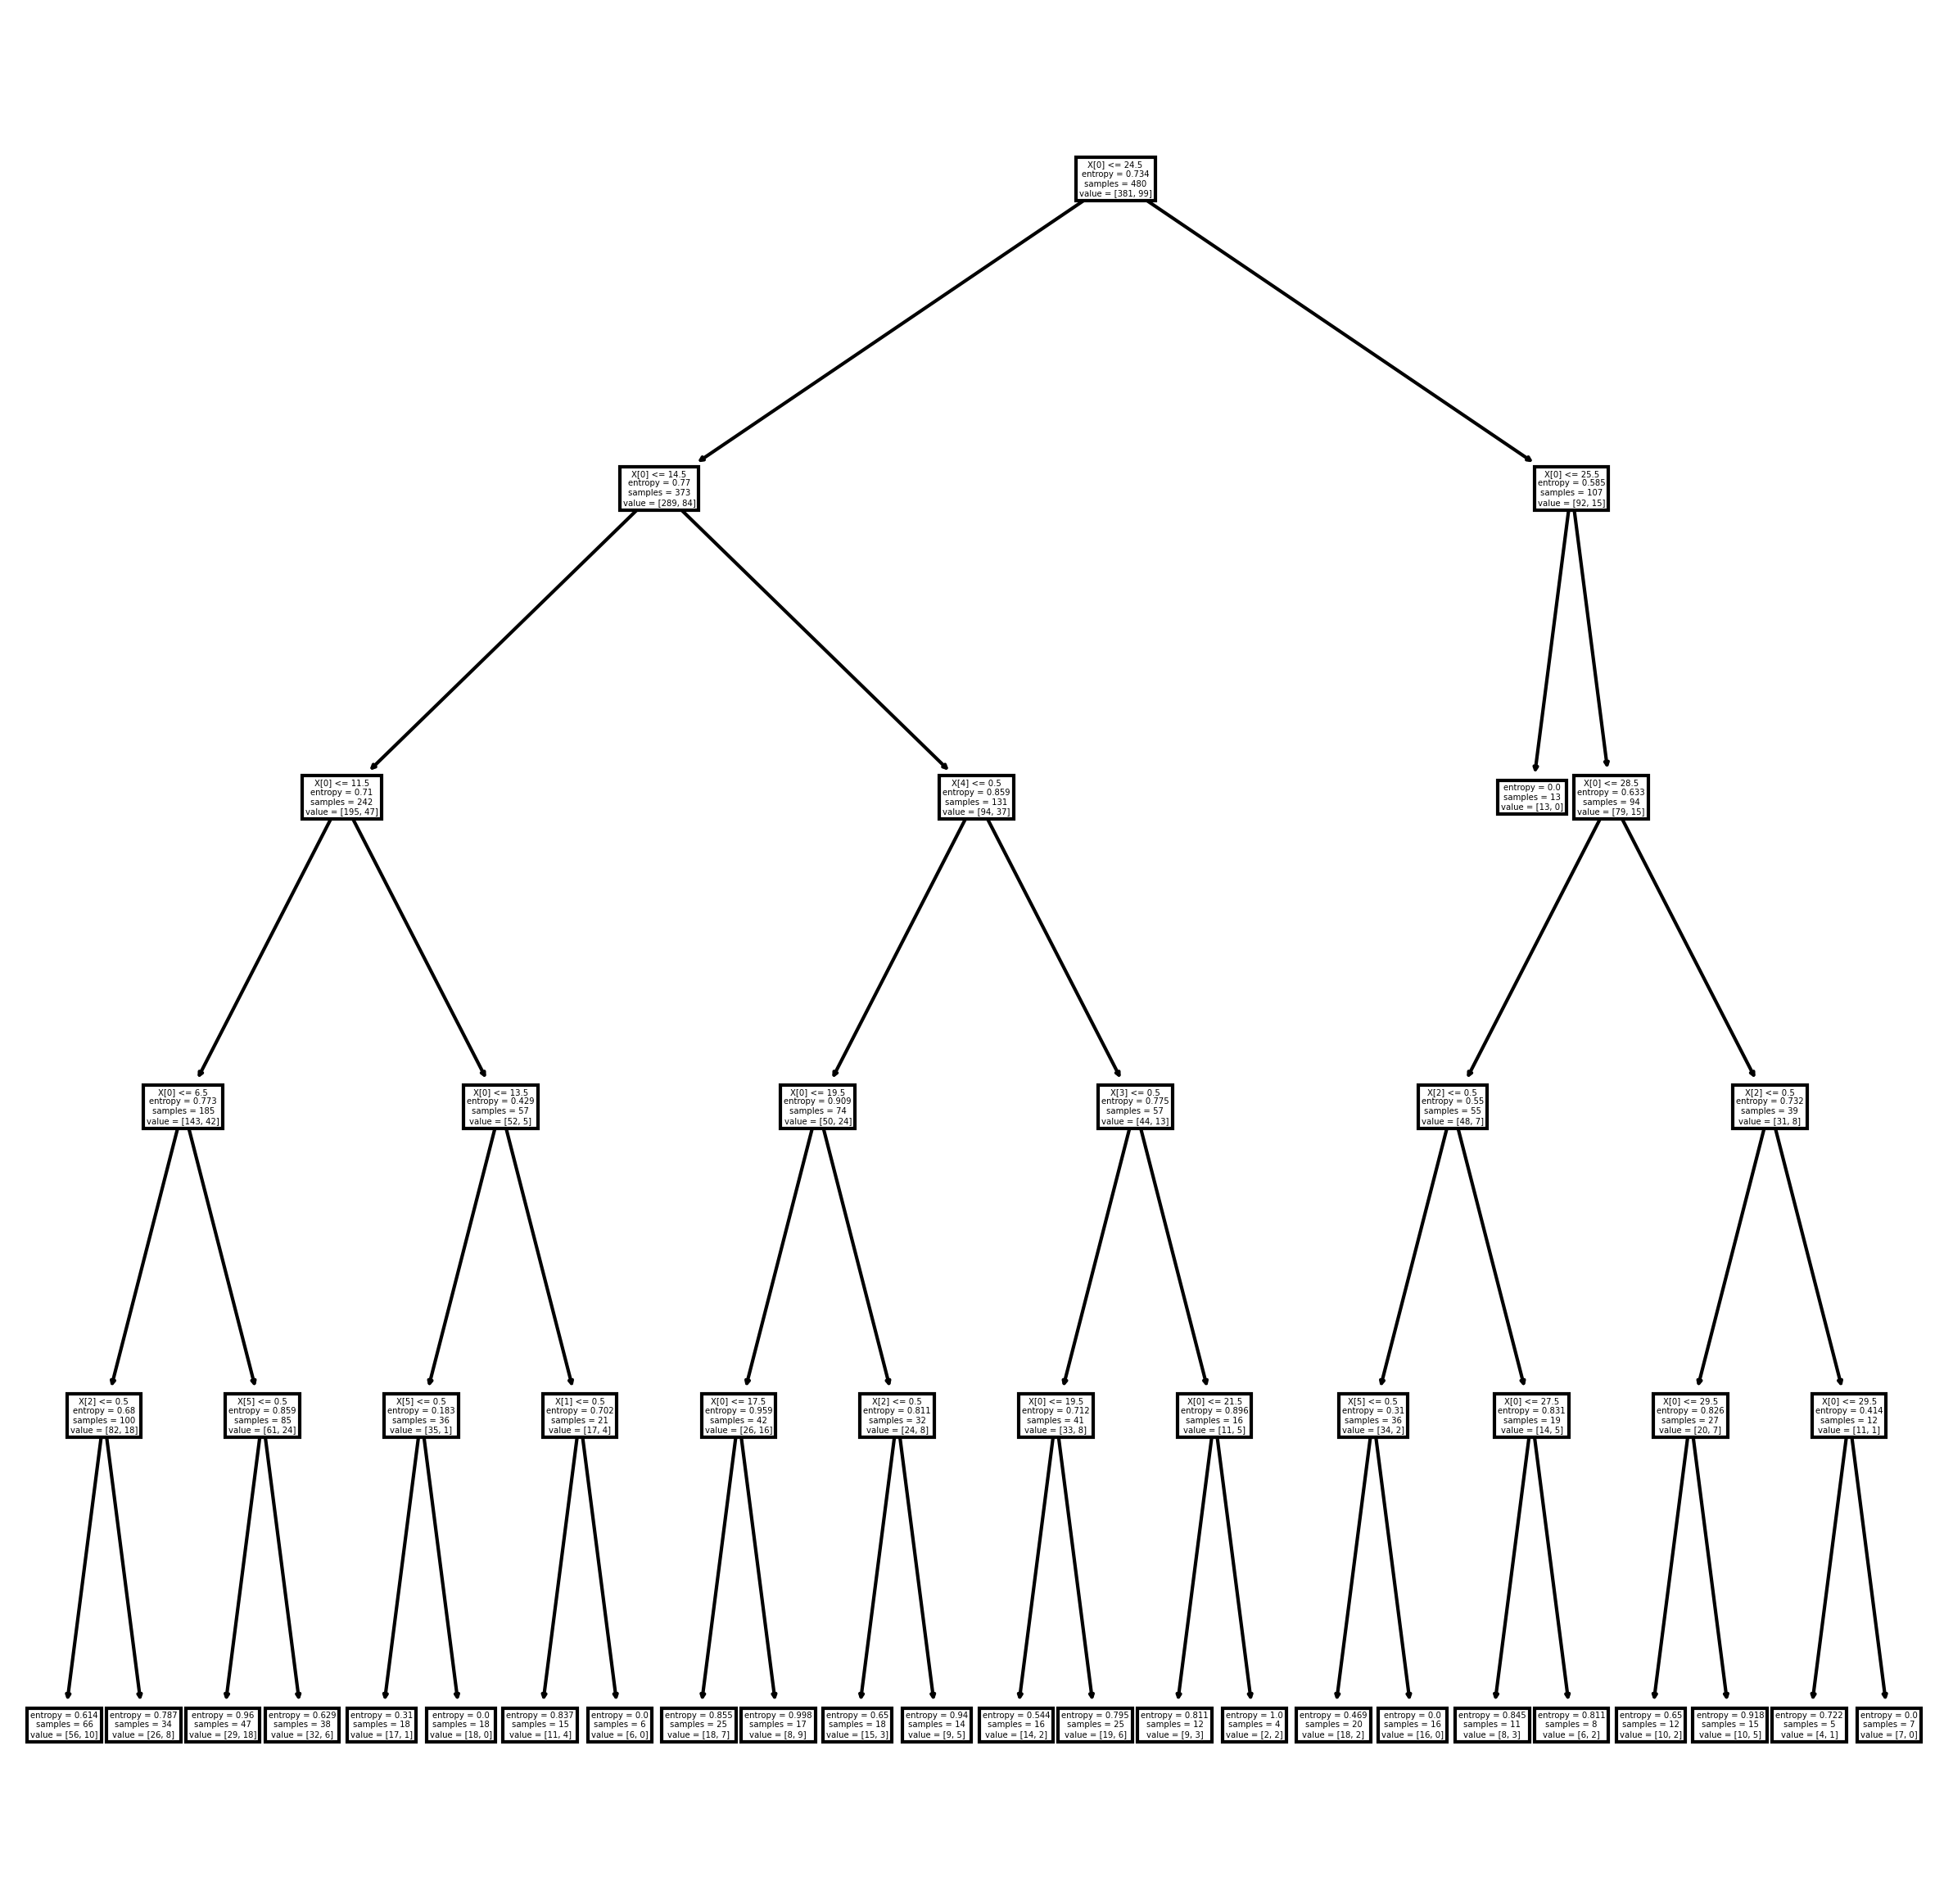

In [32]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model);

In [33]:
preds=model.predict(X_test)
pd.Series(preds).value_counts()

Good     115
Risky      5
dtype: int64

In [34]:
pd.crosstab(Y_test,preds)

col_0,Good,Risky
IncVeri,,
Good,92,3
Risky,23,2


In [35]:
np.mean(preds==Y_test)

0.7833333333333333

In [36]:
model.score(X_train,Y_train)

0.7958333333333333

In [37]:
print("Accuracy",np.mean(preds==Y_test)*100)

Accuracy 78.33333333333333


# Decision Tree Classifier Using Gini Criteria

In [38]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [39]:
model_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [40]:
preds=model_gini.predict(X_test)
print("Accuracy",np.mean(preds==Y_test)*100)

Accuracy 79.16666666666666
